In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
churn_data = pd.read_csv('data/churn.csv')
del(churn_data['RowNumber'])

churn_data['ExitedCat'] = churn_data['Exited'].apply(lambda x: 'loyal' if x else 'exited')

is_active = churn_data['IsActiveMember']
churn_data['IsActiveMember'] = is_active.apply(lambda x: 'yes' if x else 'no')

churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitedCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,yes,101348.88,1,loyal
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,yes,112542.58,0,exited
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,no,113931.57,1,loyal
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,no,93826.63,0,exited
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,yes,79084.10,0,exited


### Задание 9.1.
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0, 0.5, 'Кол-во клиентов')

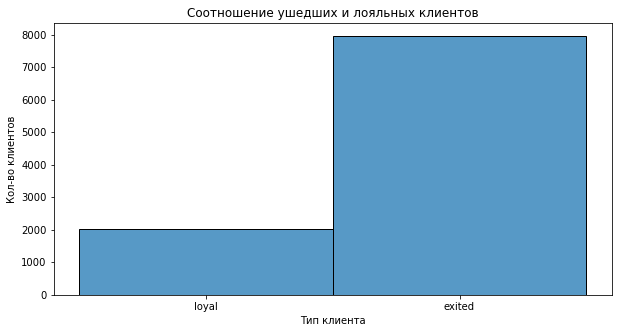

In [135]:
_ = plt.figure(figsize=(10, 5))

hist = sns.histplot(
    data=churn_data,
    x=churn_data['ExitedCat'],
    bins=2
)

hist.set_title('Соотношение ушедших и лояльных клиентов')
hist.set_xlabel('Тип клиента')
hist.set_ylabel('Кол-во клиентов')

#### Вывод: 
1. Ушедших клиентов в 4 раза больше чем лояльных.

### Задача 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0, 0.5, 'Кол-во клиентов')

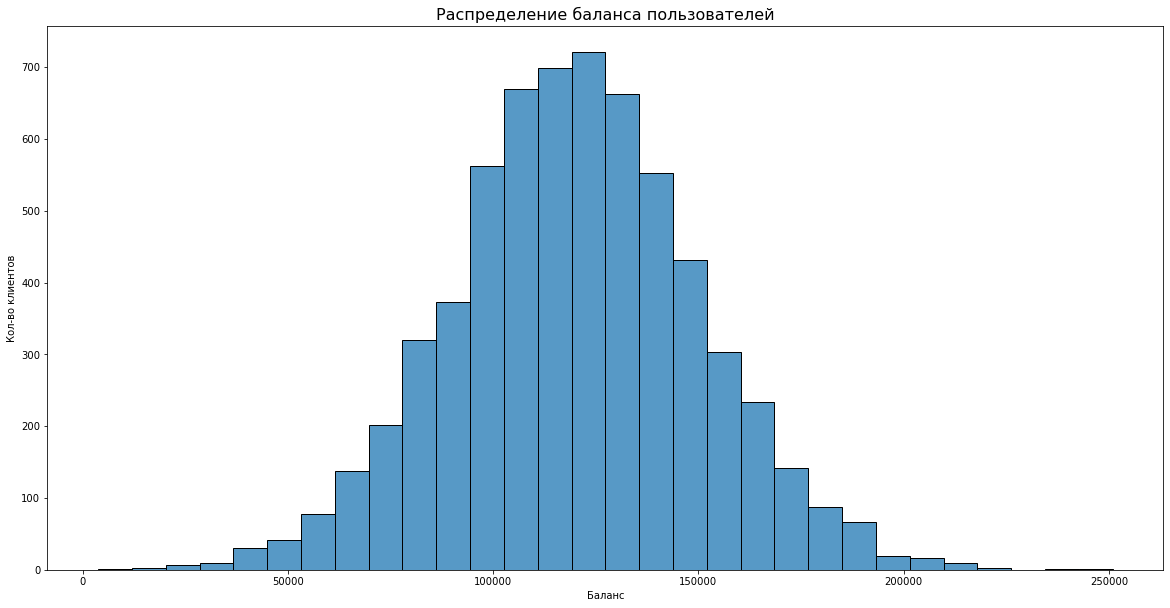

In [136]:
balance_data = churn_data[churn_data['Balance']>2500]

fig = plt.figure(figsize=(20, 10))

balance = sns.histplot(
    data=balance_data,
    x='Balance',
    bins=30
)

balance.set_title('Распределение баланса пользователей', fontsize=16)
balance.set_xlabel('Баланс')
balance.set_ylabel('Кол-во клиентов')


### Выводы
1. Баланс больше части клинтов не превышает 150 000$ но больше 100 000$

### Задание 9.3. 
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0, 0.5, 'Кол-во клиентов')

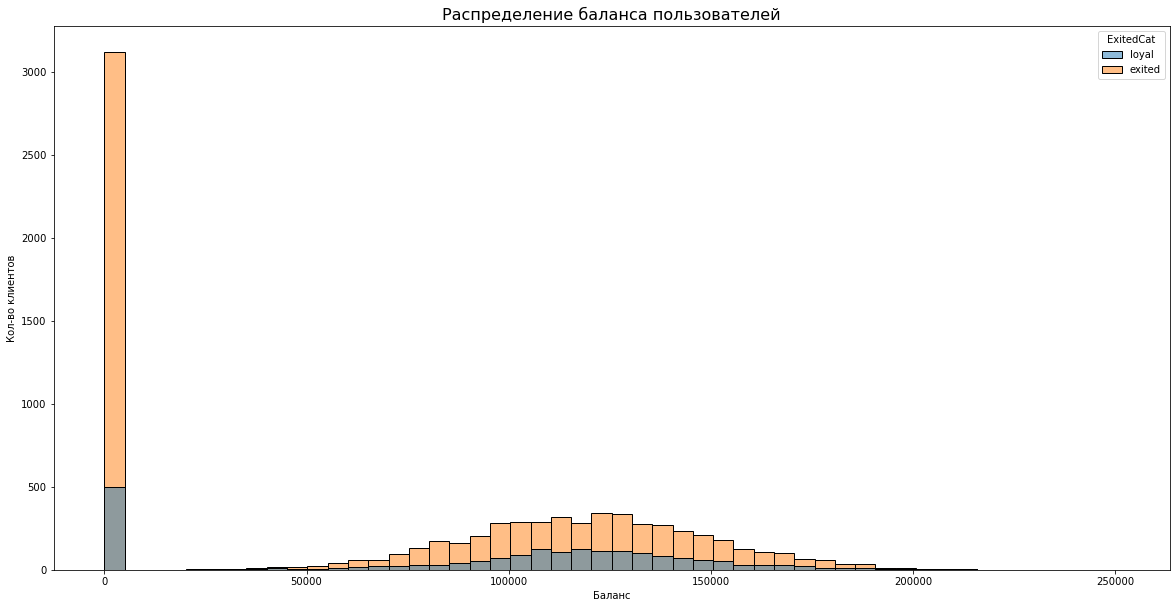

In [137]:
fig = plt.figure(figsize=(20, 10))

balance = sns.histplot(
    data=churn_data,
    # data=churn_data[churn_data['Balance']>0],
    x='Balance',
    hue='ExitedCat',
    bins=50,
)

balance.set_title('Распределение баланса пользователей', fontsize=16)
balance.set_xlabel('Баланс')
balance.set_ylabel('Кол-во клиентов')

### Выводы:
1. Абсолютное большинство ушедших клиентов имеет нулевой баланс
2. В прочих случаях корреляции между лояльностью и суммой на счету не обнаруживается.


### Задание 9.4. 
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

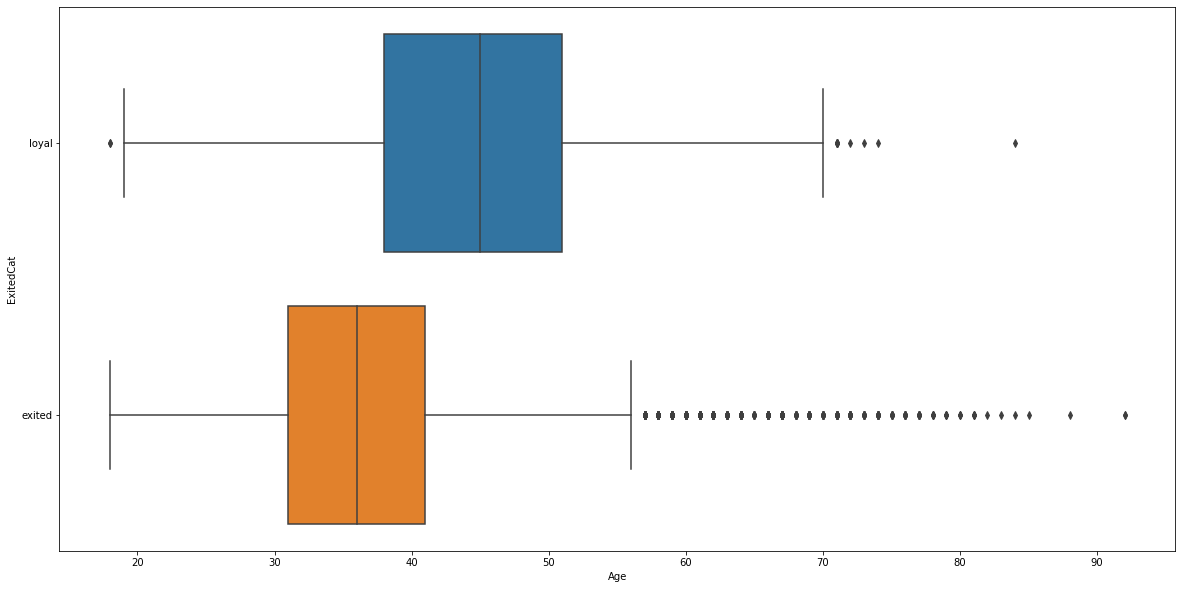

In [138]:
_ = plt.figure(figsize=(20, 10))

box = sns.boxplot(
    data=churn_data,
    x='Age',
    y='ExitedCat',
)

### Выводы
1. Выбросов больше в группе ушедших
2. Банку следует обратить внимание на возрастную группу от 30 до 37 лет, это не пересекающая часть пользователей банка которая ушла.

### Задание 9.5. 
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.



/var/folders/0l/7c83kg195b71n7hk073bcznr0000gn/T/ipykernel_50018/3072128890.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Предполагаемая ЗП (тыс)')

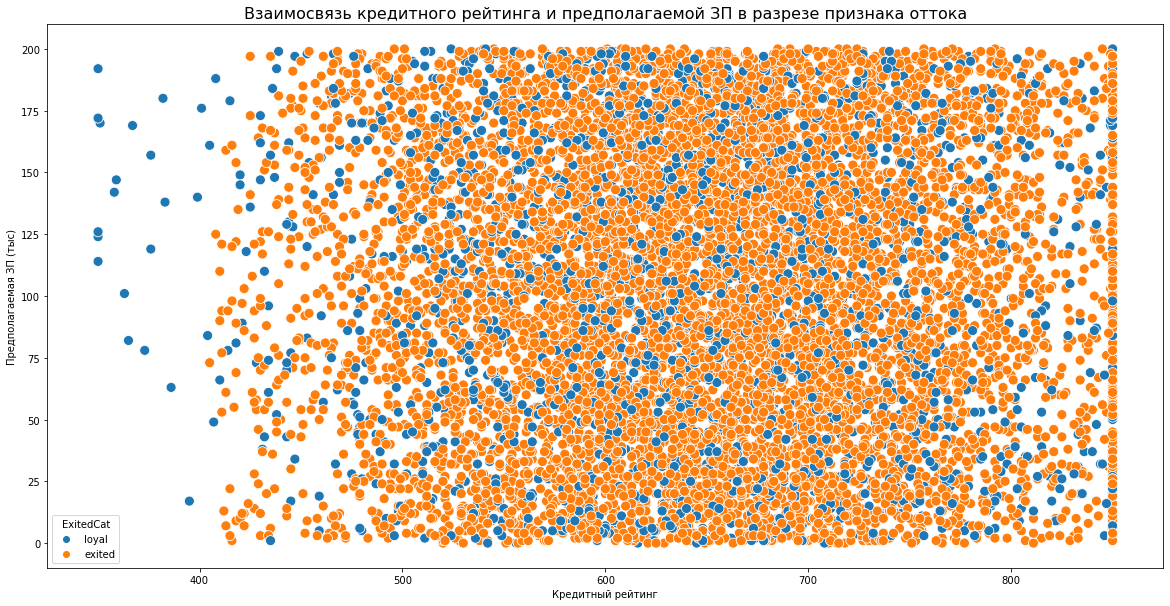

In [140]:
_ = plt.figure(figsize=(20, 10))

salary_credit_score = churn_data[['CreditScore', 'EstimatedSalary', 'ExitedCat']]
salary_credit_score['EstimatedSalary'] = salary_credit_score['EstimatedSalary'].apply(lambda x: round(x/1000))

scatterplot = sns.scatterplot(
    data=salary_credit_score,
    x='CreditScore',
    y='EstimatedSalary',
    hue='ExitedCat',
    s=100,
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга и предполагаемой ЗП в разрезе признака оттока', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая ЗП (тыс)')

### Выводы
1. Очевидных взаимосвязей ЗП и рейтинга не просматривается. 

### Задание 9.6.
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

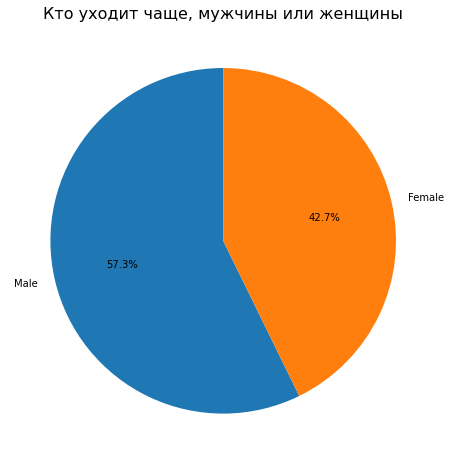

In [ ]:
import matplotlib.pyplot as plt

m_part = churn_data[(churn_data['ExitedCat']=='exited')&(churn_data['Gender']=='Male')].shape[0]
f_part = churn_data[(churn_data['ExitedCat']=='exited')&(churn_data['Gender']=='Female')].shape[0]
total = churn_data[churn_data['ExitedCat']=='exited'].shape[0]

m_part = m_part/total
f_part = f_part/total

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
pie = ax.pie(
    [m_part, f_part],
    labels=['Male', 'Female'],
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title("Кто уходит чаще, мужчины или женщины", fontsize=16)
plt.show()

### Выводы
1. Среди ушедших клиентов мужчин - больше.

### Задача 9.7. 
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

[Text(0.5, 1.0, 'Зависимость оттока клиентов от числа приобретенных услуг'),
 Text(0.5, 0, 'Продукты банка'),
 Text(0, 0.5, 'Количество участников продукта')]

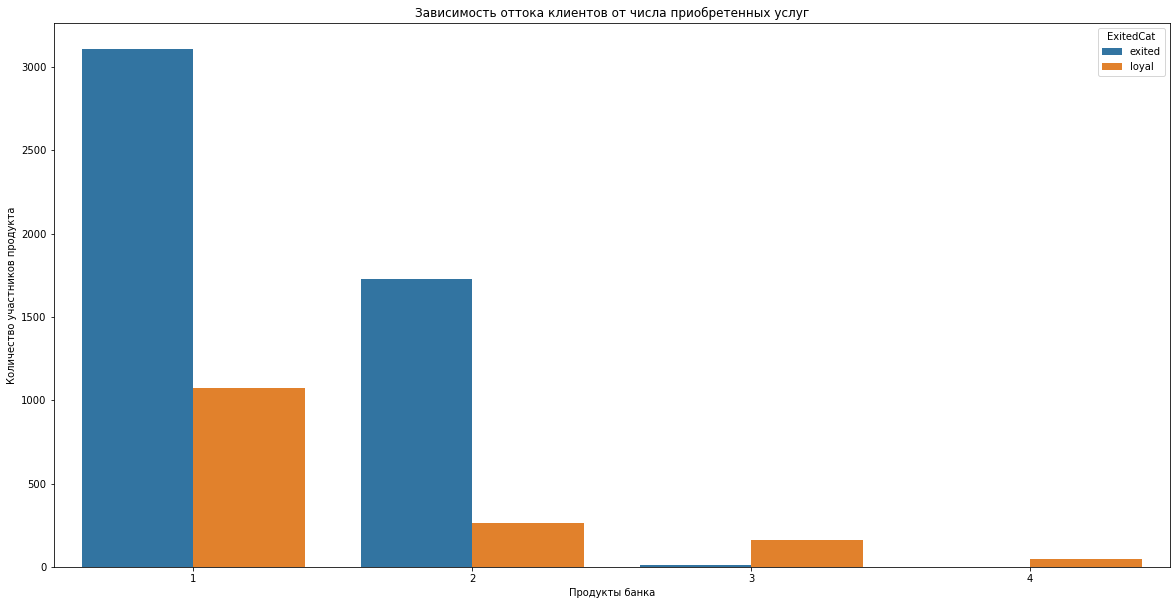

In [ ]:
data = churn_data[churn_data['Balance']>2500].groupby(['NumOfProducts', 'ExitedCat'], as_index=False)[['CustomerId']].count()

_ = plt.figure(figsize=(20, 10))
bar = sns.barplot(
    data=data,
    x='NumOfProducts',
    y='CustomerId',
    hue='ExitedCat',
);
bar.set(
    title='Зависимость оттока клиентов от числа приобретенных услуг',
    xlabel='Продукты банка',
    ylabel='Количество участников продукта',
)

### Выводы:
1. Наибольшее число ушедших клинтов среди тех кто приобрел 1 или 2 услуги банка.
2. Среди тех кто приобрел 3 и 4 услуги, подавляющее кол-во лояльных клинтов.

### Задача 9.8. 
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

,IsActiveMember,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,no,1.569082e+07,647.973603,37.997938,5.097340,77134.376863,1.524438,0.711074,100767.203854,0.268509
1,yes,1.569106e+07,652.934188,39.791497,4.933217,75875.422145,1.535624,0.700252,99452.965894,0.142691


[Text(0.5, 1.0, 'Зависимость оттока клиентов и статуса активности'),
 Text(0.5, 0, 'Активность клиентов'),
 Text(0, 0.5, 'Количество клиентов')]

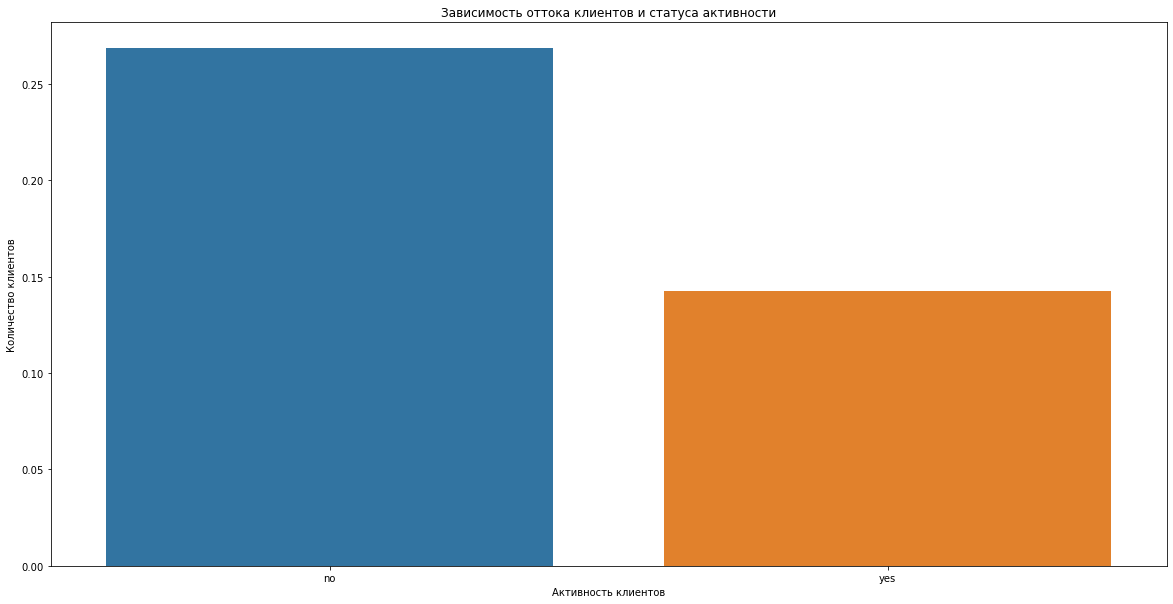

In [153]:
data = churn_data.groupby(['IsActiveMember'], as_index=False).mean()

_ = plt.figure(figsize=(20, 10))
bar = sns.barplot(
    data=data,
    x='IsActiveMember',
    y='Exited',
)
bar.set(
    title='Зависимость оттока клиентов и статуса активности',
    xlabel='Активность клиентов',
    ylabel='Средний отток клиентов',
)

### Выводы:
1. Отток среди неактивных клиентов практически в 2 раза больше чем среди активных. Банку необходимо разработать услуги, позволяющие поднять процент активных пользователей.


### Задача 9.9. 
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.



In [148]:
chor_data = churn_data.groupby(['Geography'], as_index=False).mean()

fig = px.choropleth(
    data_frame=chor_data,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    hover_name='Geography',
    color_continuous_scale='Reds',
    height=500,
    width=700,
    title='Отток клиентов на карте мира',
)
fig.show()

### Выводы:
1. Судя по диаграмме - отток клиентов наиболее высок в германии.

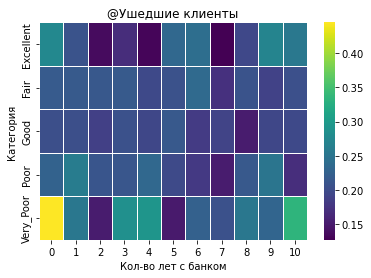

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

heatmap = sns.heatmap(
    pivot,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
)

heatmap.set_title('@Ушедшие клиенты');
heatmap.set_xlabel('Кол-во лет с банком');
heatmap.set_ylabel('Категория');

### Выводы:
1. Наиболее часто "уходящая" категория - это люди с очень низким кредитным рейтингом, являющиеся клиентами банка до 1 года